In [1]:
using Laplacians

In [2]:
include("../src/samplingSolver.jl")

purge (generic function with 1 method)

In [3]:
A = chimera(100, 1); L = lap(A);

In [4]:
@time augTreeSolver(L, tol = 1e-1, maxits = 1000, treeAlg = randishPrim);

  1.178325 seconds (1.32 M allocations: 56.196 MB, 1.44% gc time)


In [5]:
@time buildSolver(A);

  0.357817 seconds (215.06 k allocations: 66.329 MB, 4.39% gc time)


In [6]:
A = chimera(1000, 3); L = lap(A);

In [7]:
@time augTreeSolver(L, tol = 1e-1, maxits = 1000, treeAlg = randishPrim);

  0.003269 seconds (4.71 k allocations: 2.229 MB)


In [8]:
@time buildSolver(A);

  2.524592 seconds (60.72 k allocations: 1.282 GB, 6.81% gc time)


## Trying out params

In [9]:
A = chimera(500, 3); L = lap(A); n = A.n;

In [10]:
@time augTreeSolver(L, tol = 1e-1, maxits = 1000, treeAlg = randishPrim);

  0.002874 seconds (1.60 k allocations: 876.305 KB)


In [11]:
@time f,gOp,U,d = buildSolver(A, eps = 0.5, sampConst = 0.25);

  0.130625 seconds (24.86 k allocations: 7.708 MB)


In [12]:
checkError(gOp)

0.4159511544051979

In [13]:
rho = ceil(Int64, 0.25 * log(n) ^ 2 / 0.5 ^ 2), n

(39,500)

In [14]:
A = chimera(1000, 3); L = lap(A); n = A.n; 

In [15]:
@time augTreeSolver(L, tol = 1e-1, maxits = 1000, treeAlg = randishPrim);

  0.005635 seconds (4.70 k allocations: 2.153 MB)


In [16]:
eps = 0.5; sampConst = 0.20;
@time f,gOp,U,d = buildSolver(A, eps = eps, sampConst = sampConst);

  0.071891 seconds (47.22 k allocations: 37.055 MB, 24.72% gc time)


In [17]:
checkError(gOp)

0.5800355082963802

In [18]:
rho = ceil(Int64, sampConst * log(n) ^ 2 / eps ^ 2), n

(39,1000)

## Graphing it out

In [19]:
rho = []
nvec = []
time = []
dantime = []

for n in 100:200
    A = chimera(n, 1)
    L = lap(A)
    
    #first, get a rho that gives 3 consecutive runs an error smaller than 0.5, and try to have the
    # rho as small as possible
    left = 0.0
    right = 10
    
    good = right
    
    while left + 1e-5 < right
        mid = (left + right) / 2
        
        f,gOp,U,d = buildSolver(A, eps = 0.5, sampConst = mid);
        e1 = checkError(gOp)
        
        f,gOp,U,d = buildSolver(A, eps = 0.5, sampConst = mid);
        e2 = checkError(gOp)
        
        f,gOp,U,d = buildSolver(A, eps = 0.5, sampConst = mid);
        e3 = checkError(gOp)
        
        if (e1 < 0.5 && e2 < 0.5 && e3 < 0.5)
            good = mid
            right = mid
        else
            left = mid
        end
    
        push!(rho, ceil(Int64, sampConst * log(n) ^ 2 / eps ^ 2))
        push!(nvec, n)
        tic()
        f,gOp,U,d = buildSolver(A, eps = 0.5, sampConst = good);
        t = toc();
        push!(time, t)
        
        L = lap(A);
        tic()
        f,gOp,U,d = buildSolver(A, eps = eps, sampConst = sampConst);
        t = toc()
        push!(dantime, t)
        
    end
    
end

elapsed time: 0.027490909 seconds
elapsed time: 0.001340985 seconds
elapsed time: 0.010812911 seconds
elapsed time: 0.004250234 seconds
elapsed time: 0.008621318 seconds
elapsed time: 0.001930431 seconds
elapsed time: 0.003108341 seconds
elapsed time: 0.001267138 seconds
elapsed time: 0.001951877 seconds
elapsed time: 0.004332272 seconds
elapsed time: 0.001767488 seconds
elapsed time: 0.001974236 seconds
elapsed time: 0.001356818 seconds
elapsed time: 0.001564768 seconds
elapsed time: 0.005144815 seconds
elapsed time: 0.001551244 seconds
elapsed time: 0.001065349 seconds
elapsed time: 0.001691913 seconds
elapsed time: 0.001469659 seconds
elapsed time: 0.001631972 seconds
elapsed time: 0.001039387 seconds
elapsed time: 0.001243959 seconds
elapsed time: 0.001031906 seconds
elapsed time: 0.00121781 seconds
elapsed time: 0.00103589 seconds
elapsed time: 0.001893925 seconds
elapsed time: 0.001070144 seconds
elapsed time: 0.001249984 seconds
elapsed time: 0.000967825 seconds
elapsed time: 0.

In [20]:
using PyPlot

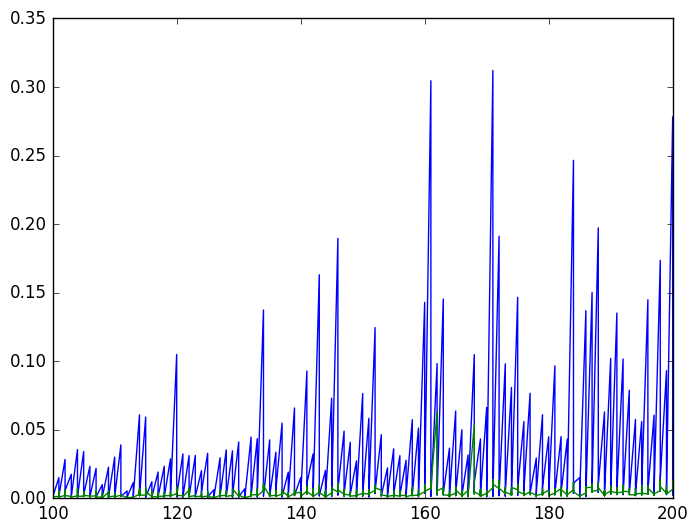

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x318f90e50>

In [21]:
plot(nvec, time)
plot(nvec, dantime)

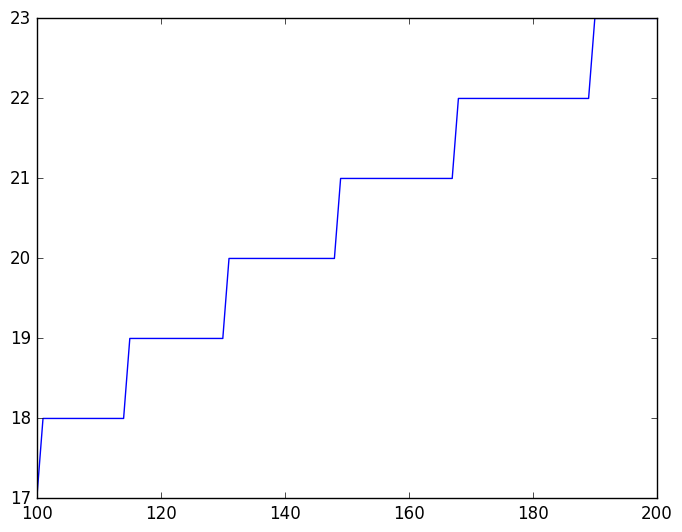

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x31a483e90>

In [22]:
plot(nvec, rho)

## Larger values of n

In [23]:
rho = []
nvec = []
time = []
dantime = []

for n in 1000:1050
    A = chimera(n, 1)
    L = lap(A)
    
    #first, get a rho that gives 3 consecutive runs an error smaller than 0.5, and try to have the
    # rho as small as possible
    left = 0.0
    right = 10
    
    good = right
    
    while left + 1e-5 < right
        mid = (left + right) / 2
        
        f,gOp,U,d = buildSolver(A, eps = 0.5, sampConst = mid);
        e1 = checkError(gOp)
        
        f,gOp,U,d = buildSolver(A, eps = 0.5, sampConst = mid);
        e2 = checkError(gOp)
        
        f,gOp,U,d = buildSolver(A, eps = 0.5, sampConst = mid);
        e3 = checkError(gOp)
        
        if (e1 < 0.5 && e2 < 0.5 && e3 < 0.5)
            good = mid
            right = mid
        else
            left = mid
        end
    
        push!(rho, ceil(Int64, sampConst * log(n) ^ 2 / eps ^ 2))
        push!(nvec, n)
        tic()
        f,gOp,U,d = buildSolver(A, eps = 0.5, sampConst = good);
        t = toc();
        push!(time, t)
        
        L = lap(A);
        tic()
        f,gOp,U,d = buildSolver(A, eps = eps, sampConst = sampConst);
        t = toc()
        push!(dantime, t)
        
    end
    
end

elapsed time: 4.268745206 seconds
elapsed time: 0.142858738 seconds
elapsed time: 1.925691105 seconds
elapsed time: 0.610297206 seconds
elapsed time: 0.691126963 seconds
elapsed time: 0.325450673 seconds
elapsed time: 0.339907398 seconds
elapsed time: 0.118450303 seconds
elapsed time: 0.264920865 seconds
elapsed time: 0.123770376 seconds
elapsed time: 0.097401533 seconds
elapsed time: 0.202597232 seconds
elapsed time: 0.053082008 seconds
elapsed time: 0.132592643 seconds
elapsed time: 0.04961367 seconds
elapsed time: 0.274796113 seconds
elapsed time: 0.044677942 seconds
elapsed time: 0.157374644 seconds
elapsed time: 0.05321589 seconds
elapsed time: 0.130591513 seconds
elapsed time: 0.098553637 seconds
elapsed time: 0.134209771 seconds
elapsed time: 0.049691347 seconds
elapsed time: 0.186092097 seconds
elapsed time: 0.04489879 seconds
elapsed time: 0.127970965 seconds
elapsed time: 0.063018142 seconds
elapsed time: 0.179958222 seconds
elapsed time: 0.105965342 seconds
elapsed time: 0.1

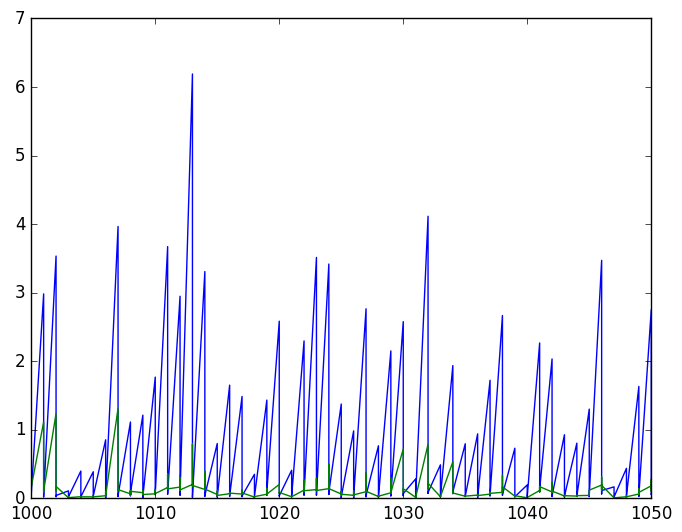

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x31a6fe9d0>

In [24]:
plot(nvec, time)
plot(nvec, dantime)

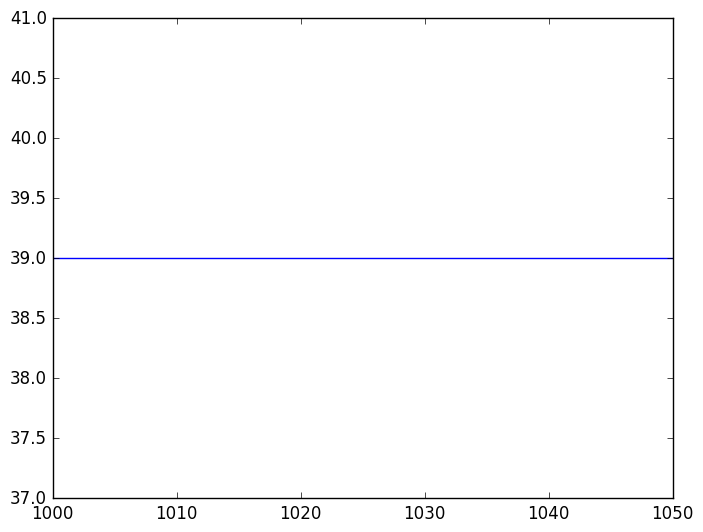

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x31de4b590>

In [25]:
plot(nvec, rho)